### ดัชนีเซมิคอนดัคเตอร์ฟิลลาเดเฟีย : SOX VS. แก๊งอิเล็ค

### ดึงราคาหุ้นผ่าน TradingView

In [79]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd

In [2]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [60]:
kce = tv.get_hist(symbol='kce',exchange='set',interval=Interval.in_monthly,n_bars=150)
kce.head(5)

symbol  open  high   low  close       volume
datetime                                                          
2009-08-03 09:00:00  set:kce  0.90  1.16  0.85   1.15  475502400.0
2009-09-01 09:00:00  set:kce  1.17  1.63  1.10   1.57  396934200.0
2009-10-01 09:00:00  set:kce  1.57  2.15  1.56   1.89  305947800.0
2009-11-02 09:00:00  set:kce  1.85  2.27  1.82   1.95  436241600.0
2009-12-01 09:00:00  set:kce  1.97  2.12  1.95   2.08  131391800.0

<AxesSubplot:title={'center':'KCE'}, xlabel='datetime'>

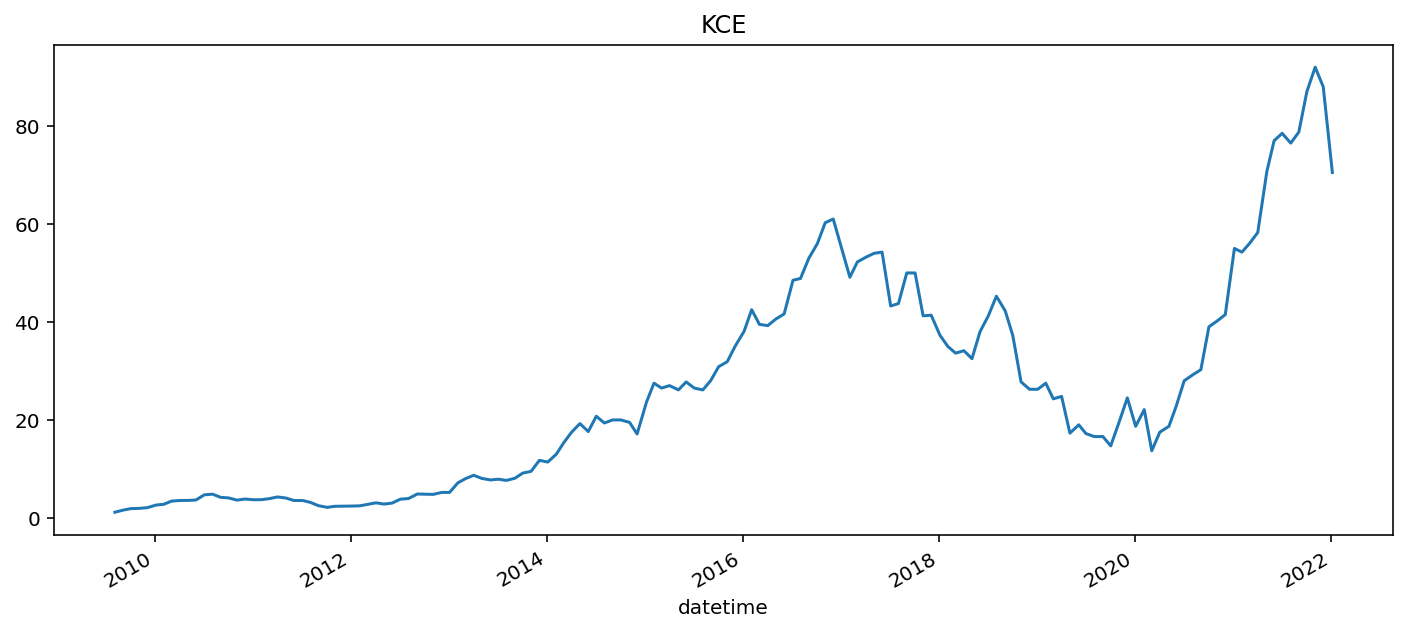

In [61]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
kce['close'].plot(figsize=(12,5),title='KCE')

### ดัชนีเซมิคอนดัคเตอร์ฟิลลาเดเฟีย : SOX

In [72]:
sox = tv.get_hist(symbol='sox',exchange='nasdaq',interval=Interval.in_monthly,n_bars=150)
sox.head(5)

symbol       open       high        low      close  \
datetime                                                                      
2009-08-03 20:30:00  nasdaq:sox  303.97998  316.32007  285.25000  306.17993   
2009-09-01 20:30:00  nasdaq:sox  305.45996  337.03003  295.80981  325.75000   
2009-10-01 20:30:00  nasdaq:sox  326.55005  337.15991  295.28979  296.60986   
2009-11-02 21:30:00  nasdaq:sox  297.08008  325.15991  288.10986  310.04980   
2009-12-01 21:30:00  nasdaq:sox  313.76001  364.27002  313.75977  359.90991   

                            volume  
datetime                            
2009-08-03 20:30:00  1.000000e+100  
2009-09-01 20:30:00  1.000000e+100  
2009-10-01 20:30:00  1.000000e+100  
2009-11-02 21:30:00  1.000000e+100  
2009-12-01 21:30:00  1.000000e+100

In [87]:
#สกัดเอาเวลาออก
sox['Date'] = pd.to_datetime(sox.index)
sox['Date'] = sox['Date'].dt.strftime('%Y-%m-%d')
sox = sox.set_index('Date')

In [88]:
kce['Date'] = pd.to_datetime(kce.index)
kce['Date'] = kce['Date'].dt.strftime('%Y-%m-%d')
kce = kce.set_index('Date')

In [90]:
kce['sox'] = sox['close']

In [92]:
kce = kce.dropna()

### ความสัมพันธ์ของ kce กับดัชนีเซมิคอนดัคเตอร์ฟิลลาเดเฟีย : SOX

In [95]:
kce[['close','sox']].corr()

close       sox
close  1.000000  0.762379
sox    0.762379  1.000000

<AxesSubplot:xlabel='Date'>

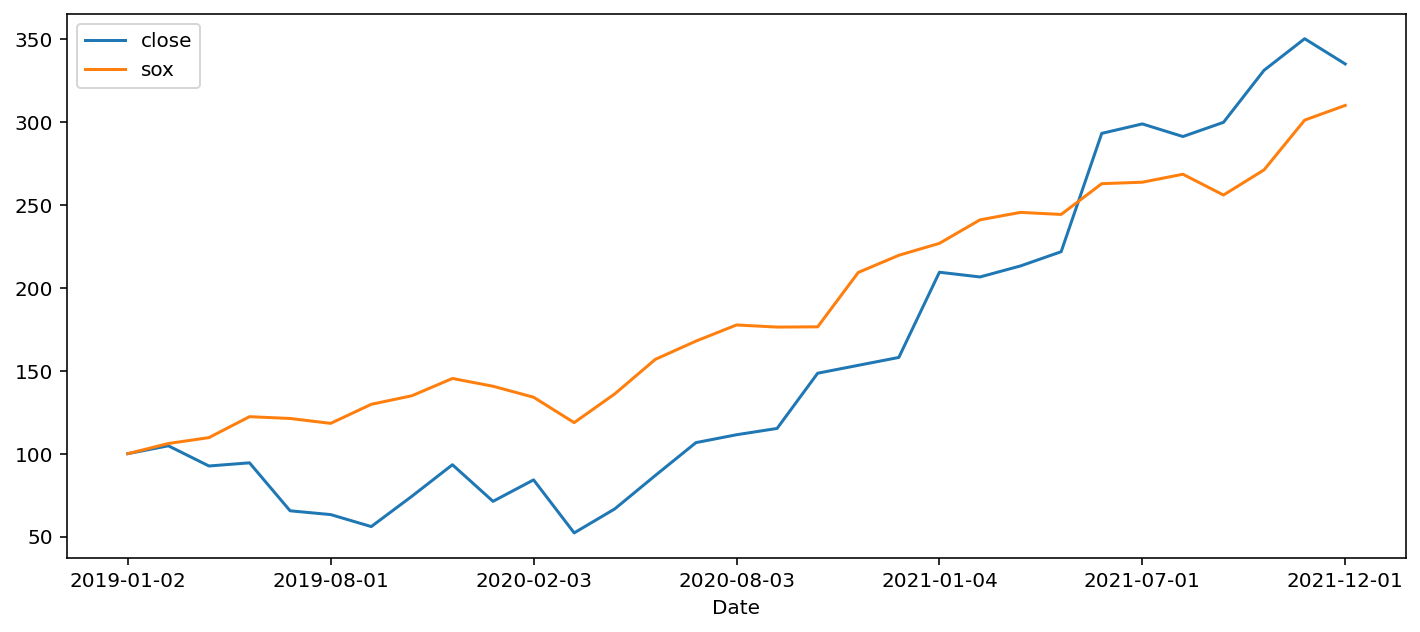

In [122]:
kce[kce.index>'2018-12-31'][['close','sox']].rebase(100).plot(figsize=(12,5))

In [123]:
#ถ้าคิดตั้งแต่ปี 2019 เป็นต้นไป
kce[kce.index>'2018-12-31'][['close','sox']].corr()

close       sox
close  1.000000  0.948251
sox    0.948251  1.000000